<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий. Нам необходимо разработать прототип модели машинного обучения, которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого мы будем Использовать данные с параметрами добычи и очистки. 

## Подготовка данных

Вызовем все нужные библиотеки и инструменты

In [34]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime as d

Загрузим данные и ознакомимся с ними.

In [35]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')


In [36]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [38]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [39]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [40]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [41]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Мы открыли и рассмотрели данные. Далее проверим, правильно ли рассчитана эффективность обогащения. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём среднюю абсолютную ошибку (MAE) между нашими расчётами и значением признака.

In [42]:
c = data_train['rougher.output.concentrate_au']  #доля золота в концентрате после флотации
f = data_train['rougher.input.feed_au'] #доля золота в концентрате до флотации
t = data_train['rougher.output.tail_au']  #доля золота в отвальных хвостах после флотации.

data_train['recovery_au'] = ((c * (f - t)) / (f * (c - t))) * 100

#Найдём MAE между расчётами и значением признака
mean_absolute_error(data_train['rougher.output.recovery'] , data_train['recovery_au'])

9.73512347450521e-15

МАЕ практически равна 0, значит, данные достоверны и по ним возможно далее продолжать исследование и строить модель, чтобы спрогнозировать долю золота. 

В тестовой выборке доступны не все признаки. Посмотрим, какие именно пропущены. 

In [43]:
columns_test = data_test.columns.tolist()
columns_full = data_full.columns.tolist()
columns_needless = list(set(columns_full) - set(columns_test))
print('В тестовой выборке отсуствуют', len(columns_needless), 'столбца')
print()
print('Столбцы, которых нет в тестовой выборке:', '\n', *columns_needless, sep='\n')

В тестовой выборке отсуствуют 34 столбца

Столбцы, которых нет в тестовой выборке:


rougher.output.recovery
final.output.tail_pb
rougher.output.concentrate_ag
primary_cleaner.output.concentrate_ag
final.output.tail_au
primary_cleaner.output.concentrate_sol
final.output.concentrate_pb
final.output.concentrate_au
rougher.output.concentrate_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
secondary_cleaner.output.tail_sol
rougher.calculation.floatbank11_sulfate_to_au_feed
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
rougher.output.tail_pb
rougher.output.tail_ag
rougher.calculation.au_pb_ratio
final.output.recovery
secondary_cleaner.output.tail_ag
final.output.concentrate_sol
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.output.concentrate_sol
rougher.output.concentrate_pb
rougher.output.tail_sol
primary_cleaner.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_pb
final.output.tai

В тестовой выборке отсутствуют признаки, связанные с 'output' и 'calculation' - параметрами продукта (не сырья) на всех этапах и расчётными характеристиками флотации. Так как тестовая выборка - это новые данные, то этих признаков в них и не должно быть, ибо они замеряются и рассчитываются позже. Также в тестовой выборке нет целевых признаков - rougher.output.recovery и final.output.recovery. 
Значит, для обучения модели мы возьмём только те признаки, которые есть в тестовой выборке, а также целевые признаки. 

Перед обучением нам необходимо провести предобработку данных - проверить их на пропуски и дубликаты и, если понадобится, обработать их. 

In [44]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [45]:
lack_train = pd.isnull(data_train).sum().sum()
print('Количество пропущенных значений в обучающей выборке =', lack_train)
lack_test = pd.isnull(data_test).sum().sum()
print('Количество пропущенных значений в тестовой выборке =', lack_test)

Количество пропущенных значений в обучающей выборке = 4100
Количество пропущенных значений в тестовой выборке = 90


Несмотря на то что пропусков не много, логика задачи позволяет их заполнить: данные по времени идут последовательно друг за другом, значения похожи. Значит, если есть пропуск, то значение признака можно взять из предыдущей записи. Заполним пропуски. Пропуски в обучающей выборке будем брать из обучающего же датасета, а в тестовой - из тестового, не будем обращаться к полным данным, чтобы не произошло утечки. 

In [46]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

In [47]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Мы подготовили данные: проверили формулу вычисления эффективности обогащения, проанализировали признаки, недоступные в тестовой выборке, провели предобработку данных (заполнили пропуски). Теперь можем перейти к анализу данных. 

## Анализ данных

Проанализируем, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Лучше строить гистограммы по каждому металлу. Да, графики должными быть четыре в одном: по одному металлу несколько этапов очистки. Чтобы видеть как менялось концетрация металла с каждым этапом

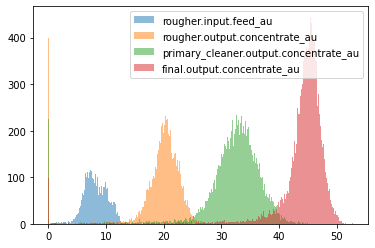

In [48]:
#построим гистограммы распределения концентрации на разных этапах для золота
pyplot.hist(data_full['rougher.input.feed_au'], bins = 500, alpha=0.5, label='rougher.input.feed_au')
pyplot.hist(data_full['rougher.output.concentrate_au'], bins=500, alpha=0.5, label='rougher.output.concentrate_au')
pyplot.hist(data_full['primary_cleaner.output.concentrate_au'], bins = 500, alpha=0.5, label='primary_cleaner.output.concentrate_au')
pyplot.hist(data_full['final.output.concentrate_au'], bins = 500, alpha=0.5, label='final.output.concentrate_au')
pyplot.legend(loc='upper right')
pyplot.show()

Как видим, распределение нормальное на каждом этапе, и на каждом же этапе концентрация золота растёт. 

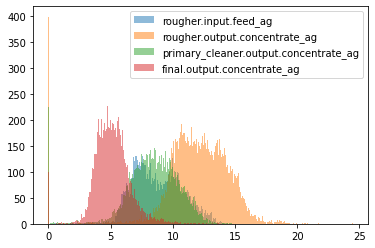

In [49]:
#построим гистограммы распределения концентрации на разных этапах для серебра
pyplot.hist(data_full['rougher.input.feed_ag'], bins = 500, alpha=0.5, label='rougher.input.feed_ag')
pyplot.hist(data_full['rougher.output.concentrate_ag'], bins=500, alpha=0.5, label='rougher.output.concentrate_ag')
pyplot.hist(data_full['primary_cleaner.output.concentrate_ag'], bins = 500, alpha=0.5, label='primary_cleaner.output.concentrate_ag')
pyplot.hist(data_full['final.output.concentrate_ag'], bins = 500, alpha=0.5, label='final.output.concentrate_ag')
pyplot.legend(loc='upper right')
pyplot.show()

Видим, что после флотации концентрация серебра растёт, однако с каждой следующей очисктой серебра в составе становится всё меньше.

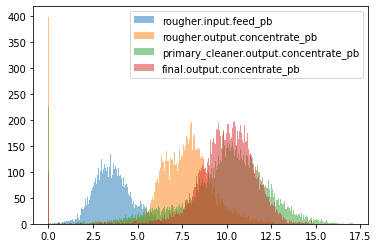

In [50]:
#построим гистограммы распределения концентрации на разных этапах для серебра
pyplot.hist(data_full['rougher.input.feed_pb'], bins = 500, alpha=0.5, label='rougher.input.feed_pb')
pyplot.hist(data_full['rougher.output.concentrate_pb'], bins=500, alpha=0.5, label='rougher.output.concentrate_pb')
pyplot.hist(data_full['primary_cleaner.output.concentrate_pb'], bins = 500, alpha=0.5, label='primary_cleaner.output.concentrate_pb')
pyplot.hist(data_full['final.output.concentrate_pb'], bins = 500, alpha=0.5, label='final.output.concentrate_pb')
pyplot.legend(loc='upper right')
pyplot.show()

Видим, что после флотации концентрация свинца возрастает, после первой очистки вновь возрастает, превращаясь в широкое нормальное распределение, после второй очистки распределение сужается и сама концентрация ещё растёт. 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Нам нужно убедиться, что распределения не сильно отличаются друг от друга, в противном случае оценка модели будет неверной.

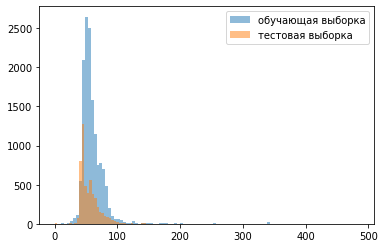

In [51]:

#рассмотрим размер гранул при флотации
pyplot.hist(data_train['rougher.input.feed_size'],  bins = 100, alpha=0.5, label='обучающая выборка')
pyplot.hist(data_test['rougher.input.feed_size'],  bins= 100, alpha=0.5, label='тестовая выборка')
pyplot.legend(loc='upper right')
pyplot.show()

Видим, что графики отличаются по высоте (из-за того, что в выборках разное количество объектов), однако их распределения похожи. 

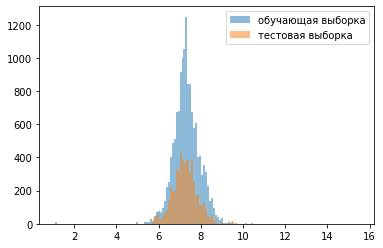

In [52]:
#рассмотрим размер гранул при первичной очистке
pyplot.hist(data_train['primary_cleaner.input.feed_size'], bins = 100, alpha=0.5, label='обучающая выборка')
pyplot.hist(data_test['primary_cleaner.input.feed_size'], bins= 100, alpha=0.5, label='тестовая выборка')
pyplot.legend(loc='upper right')
pyplot.show()

Наблюдаем принципиально схожую картину: видим, что несмотря на то, что высота гистограмм разная, распределения всё же похожи.

Рассмотрим эти же признаки на графиках плотности вероятности

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rougher.input.feed_size', ylabel='Density'>

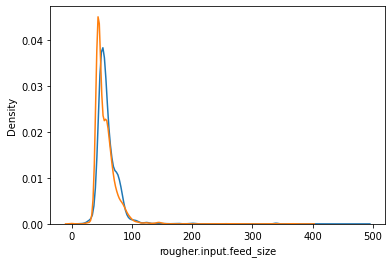

In [53]:
sns.distplot(data_train['rougher.input.feed_size'], hist = False)
sns.distplot(data_test['rougher.input.feed_size'], hist = False)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='primary_cleaner.input.feed_size', ylabel='Density'>

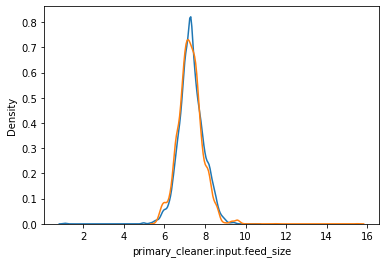

In [54]:
sns.distplot(data_train['primary_cleaner.input.feed_size'], hist = False)
sns.distplot(data_test['primary_cleaner.input.feed_size'], hist = False)

Мы наблюдаем ту же картину. Поэтому делаем вывод, что распределения схожи. Они не станут проблемой при прогнозировании с помощью модели. 

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [55]:
data_train['rougher.input.feed_sum'] = data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol']
data_train['rougher.output.concentrate_sum'] = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol']
data_train['final.output.concentrate_sum'] = data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol']

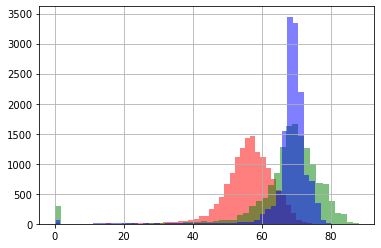

Красным: в сырье перед флотацией
Зеленным: в черновом варианте концентрата
Синим: в финальной стадии концетрата


In [56]:
data_train['rougher.input.feed_sum'].hist(bins=50, alpha=0.5, color='r')
data_train['rougher.output.concentrate_sum'].hist(bins=50, alpha=0.5, color='g')
data_train['final.output.concentrate_sum'].hist(bins=50, alpha=0.5, color='b')
pyplot.show()
print("Красным: в сырье перед флотацией")
print("Зеленным: в черновом варианте концентрата")
print("Синим: в финальной стадии концетрата")

Видим выбросы около ноля. Всё, что меньше 5, можно смело удалить. 

In [57]:
data_train = data_train.loc[data_train['rougher.input.feed_sum'] > 5]
data_train = data_train.loc[data_train['rougher.output.concentrate_sum'] > 5]
data_train = data_train.loc[data_train['final.output.concentrate_sum'] > 5]

Мы заврешили исследовательский анализ данных, теперь переходим к построению модели. 

## Модель

Прежде, чем обучать и проверять модели, нужно добавить в тестовую выборку целевые признаки - "rougher.output.recovery" и "final.output.recovery". 
В обучающей выборке мы оставим только те признаки, которые есть в тестовой.  

In [58]:
data_test = data_test.set_index('date')
data_full = data_full.set_index('date')
data_test['rougher.output.recovery'] = data_full['rougher.output.recovery'].loc[data_test.index]
data_test['final.output.recovery'] = data_full['final.output.recovery'].loc[data_test.index]
data_test = data_test.reset_index()
data_full = data_full.reset_index()

In [59]:
columns_test = data_test.columns.tolist()
columns_full = data_full.columns.tolist()
columns_needless = list(set(columns_full) - set(columns_test))
data_train = data_train.drop(columns_needless, axis=1)
data_train = data_train.drop(['recovery_au', 'rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'final.output.concentrate_sum'], axis=1)

Так как нас интересуют два целевых признака ('rougher.output.recovery', 'final.output.recovery'), то нужно будет построить две модели. Начнём с модели для 'rougher.output.recovery'. Объявим target и features для обучающей и тестовой выборок. 

In [60]:

features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1).reset_index(drop = True)
try:
    features_train = features_train.drop(columns = ['index'])
except:
    pass

target_train_rough = data_train['rougher.output.recovery'].reset_index(drop = True)
try:
    target_train_rough = target_train_rough.drop(columns = ['index'])
except:
    pass

target_train_final = data_train['final.output.recovery'].reset_index(drop = True)
try:
    target_train_final = target_train_final.drop(columns = ['index'])
except:
    pass

features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test_rough = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']
#display(features_train)

In [61]:
def smape(target, predictions):
    fraction = abs(target - predictions) / ((abs(target) + abs(predictions)) / 2) 
    return sum(fraction) * 100 / len(target) 
 
#функция для итогового sMAPE
def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

from datetime import datetime as d
print(d.now(), 'program start')
smape_scorer = make_scorer(smape, greater_is_better=False)

2022-10-29 20:00:33.870555 program start


In [63]:
#Модели для rough (после флотации)
model_tree_rough = DecisionTreeRegressor(random_state=12345)
scores_tree_rough = cross_val_score(model_tree_rough, features_train, target_train_rough, scoring=smape_scorer, cv=5)
print(d.now(), 'model_tree_rough smape:', scores_tree_rough.mean())

model_forest_rough = RandomForestRegressor(max_depth=4, n_estimators=100, min_samples_leaf= 7, random_state=12345)
scores_forest_rough = cross_val_score(model_forest_rough, features_train, target_train_rough, scoring=smape_scorer, cv=5)
print(d.now(), 'model_forest_rough smape:', scores_forest_rough.mean())

model_reg_rough = LinearRegression()
scores_reg_rough = cross_val_score(model_reg_rough, features_train, target_train_rough, scoring=smape_scorer, cv=5)
print(d.now(), 'model_reg_rough smape:', scores_reg_rough.mean())

#Модели для final - финальный концентрат

model_tree_final = DecisionTreeRegressor(random_state=12345)
scores_tree_final = cross_val_score(model_tree_final, features_train, target_train_final, scoring=smape_scorer, cv=5)
print(d.now(), 'model_tree_final smape', scores_tree_final.mean())

model_forest_final = RandomForestRegressor(max_depth=4, n_estimators=100, min_samples_leaf= 7, random_state=12345)
scores_forest_final = cross_val_score(model_forest_final, features_train, target_train_final, scoring=smape_scorer, cv=5)
print(d.now(), 'model_forest_final smape', scores_forest_final.mean())

model_reg_final = LinearRegression()
scores_reg_final = cross_val_score(model_reg_final, features_train, target_train_final, scoring=smape_scorer, cv=5)
print(d.now(), 'model_reg_final smape:', scores_reg_final.mean())

2022-10-29 17:29:39.373479 model_tree_rough smape: -10.582526945850805
2022-10-29 17:30:36.625049 model_forest_rough smape: -6.698129469093075
2022-10-29 17:30:38.084584 model_reg_rough smape: -7.224944105357397
2022-10-29 17:30:42.356354 model_tree_final smape -16.290686627228844
2022-10-29 17:31:40.021806 model_forest_final smape -8.962147317722906
2022-10-29 17:31:41.379284 model_reg_final smape: -10.961060384746496


Подберём оптимальные гиперпараметры для модели с лучшей метрикой качества (случайный лес)

In [86]:
best_model = None
best_result = 1000
n_estimators = 100
print(d.now(), 'start')
model_metrics = []

for depth in range(1, 10):
    model_forest_rough = RandomForestRegressor(random_state=12345, 
                                        n_estimators=n_estimators, 
                                        min_samples_leaf = 7, 
                                        max_depth=depth)
    model_forest_rough.fit(features_train, target_train_rough)
    scores_forest_rough = cross_val_score(model_forest_rough, features_train, target_train_rough, scoring=smape_scorer, cv=5)
    result = scores_forest_rough.mean()
    dm = {}
    dm['depth'] = depth
    dm['result'] = result
    model_metrics.append(dm)
print(d.now(), 'end')   

df_model_metrics = pd.DataFrame(model_metrics)
df_model_metrics['result'] = df_model_metrics['result'].abs()
optimal_depth = df_model_metrics[df_model_metrics['result']==df_model_metrics['result'].min()]['depth'].iloc[0]
best_smape = df_model_metrics['result'].min()

print('Оптимальная глубина дерева для модели случайного леса', optimal_depth)    
print('smape для лучшей модели случайного леса:', best_smape)


2022-10-29 18:29:06.959974 start
2022-10-29 18:42:03.736392 end
Оптимальная глубина дерева для модели случайного леса 5
smape для лучшей модели случайного леса: 6.616624950163635


In [ ]:
best_model = None
best_result = 1000
n_estimators = 100

print(d.now(), 'start')
model_metrics_final = []

for depth in range(1, 10):
    model_forest_final = RandomForestRegressor(random_state=12345, 
                                        n_estimators=n_estimators, 
                                        min_samples_leaf = 7, 
                                        max_depth=depth)
    model_forest_final.fit(features_train, target_train_final)
    scores_forest_final = cross_val_score(model_forest_final, features_train, target_train_rough, scoring=smape_scorer, cv=5)
    result = scores_forest_final.mean()
    dm = {}
    dm['depth'] = depth
    dm['result'] = result
    model_metrics_final.append(dm)
print(d.now(), 'end')   

df_model_metrics_final = pd.DataFrame(model_metrics)
df_model_metrics_final['result'] = df_model_metrics_final['result'].abs()
optimal_depth = df_model_metrics_final[df_model_metrics_final['result']==df_model_metrics_final['result'].min()]['depth'].iloc[0]
best_smape = df_model_metrics_final['result'].min()

print('Оптимальная глубина дерева для модели случайного леса', optimal_depth)    
print('smape для лучшей модели случайного леса:', best_smape)


2022-10-29 19:08:20.336185 start


Выбираем случайный лес c подобранными гиперпараметрами для обоих таргетов и вычисляем метрики качества моделей. 

In [62]:
model_rough = RandomForestRegressor(max_depth=5, n_estimators=100, min_samples_leaf= 7, random_state=12345)
model_rough.fit(features_train, target_train_rough)
predictions_test_rough = model_rough.predict(features_test)
smape_rough = smape(target_test_rough, predictions_test_rough)
print(smape_rough)

8.359783227281275


In [63]:
model_final = RandomForestRegressor(max_depth=5, n_estimators=150, min_samples_leaf= 7, random_state=12345)
model_final.fit(features_train, target_train_final)
predictions_test_final = model_final.predict(features_test)
smape_final = smape(target_test_final, predictions_test_final)
print(smape_final)

9.759233209430466


In [64]:
smape_result = final_smape(smape_rough, smape_final)
print('Итоговая метрика качества моделей = ', smape_result)

Итоговая метрика качества моделей =  9.409370713893168


Сравним выбранные модели с константной моделью

In [65]:
#Dummy-модель для флотации
dummy_mean = DummyRegressor(strategy = 'mean' ).fit(features_train, target_train_rough)
dummy_median = DummyRegressor(strategy = 'median' ).fit(features_train, target_train_rough)

predict_dummy_mean_rough = dummy_mean.predict(features_test)
predict_dummy_median_rough = dummy_median.predict(features_test)
smape_rough_dummy_mean = smape(target_test_rough, predict_dummy_mean_rough)
smape_rough_dummy_median = smape(target_test_rough, predict_dummy_median_rough)
print('sMAPE Dummy-модели по среднему', smape_rough_dummy_mean)
print('sMAPE Dummy-модели по медиане', smape_rough_dummy_median)
print('sMAPE построенной модели',smape_rough)

sMAPE Dummy-модели по среднему 9.067226820874161
sMAPE Dummy-модели по медиане 8.526092509812347
sMAPE построенной модели 8.359783227281275


In [66]:
#Dummy-модель для финального концентрата
dummy_mean_final = DummyRegressor(strategy = 'mean' ).fit(features_train, target_train_final)
dummy_median_final = DummyRegressor(strategy = 'median' ).fit(features_train, target_train_final)

predict_dummy_mean_final = dummy_mean_final.predict(features_test)
predict_dummy_median_final = dummy_median_final.predict(features_test)
smape_final_dummy_mean = smape(target_test_final, predict_dummy_mean_final)
smape_final_dummy_median = smape(target_test_final, predict_dummy_median_final)
print('sMAPE Dummy-модели по среднему', smape_final_dummy_mean)
print('sMAPE Dummy-модели по медиане', smape_final_dummy_median)
print('sMAPE построенной модели',smape_final)

sMAPE Dummy-модели по среднему 10.080000806513981
sMAPE Dummy-модели по медиане 9.744826571095434
sMAPE построенной модели 9.759233209430466


Построенные модели предсказывают чуть лучше константных моделей.

## Выводы

Задачей исследования было подготовить прототип модели, которая помогала бы предсказывать эффективность восстановления золота из золотосодержащей руды. Для решения задачи мы изучили датасеты (таблица с полными данными, а также таблицы с обучающей и тестовой выборкой для обученяи модели), проверили формулу эффективности восстановления золота из золотосодержащей руды, исследовали недоступные в тестовой выборке признаки, провели предобработку данных. 
В ходе исследовательского анализа данных, мы пришли к следующим выводам:

- На каждом этапе обработки доля золота в концентрате растёт
- После флотации концентрация серебра растёт, однако с каждой следующей очисткой серебра в составе становится всё меньше.
- после флотации концентрация свинца возрастает, после первой очистки вновь возрастает, превращаясь в широкое нормальное распределение, после второй очистки распределение сужается и сама концентрация вновь растёт.
- Сравнив распределения размеров гранул сырья на обучающей и тестовой выборках, мы выяснили, что эти распределения не сильно отличаются друг от друга, значит это не повлияет негативно на эффективность модели.
- На гистограмме суммарной концентрации всех веществ на разных стадиях были обнаружены выбросы, которые мы удалили

Далее мы написали функции для вычисления метрика качества будущих моделей – sMAPE, затем построили по три модели (дерево решений, случайный лес и регрессия). Мы посчитали для каждой модели sMAPE, используя кросс-валидацию. Выяснилось, что эффективнее всего «считают» модели случайного леса, для них мы подобрали оптимальные гиперпараметры. Далее мы проверили модели на тестовой выборке, посчитали финальную sMAPE и сопоставили результаты с константной моделью. Выяснилось, что построенные модели предсказывают чуть лучше, чем константные, поэтому мы можем их использовать в дальнейшем. 
